In [773]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.interpolate import make_interp_spline
from scipy.optimize import curve_fit
from datetime import timedelta

In [774]:
# Read in the data
data = []
fin = open("Data/Galaxy Data/SPARC_Lelli2016c.mrt")
lines = fin.read().split("\n")[98:-1]
for line in lines:
    data.append(line.strip().replace(",", ";").split())
print(data)

[['CamB', '10', '3.36', '0.26', '2', '65.0', '5.0', '0.075', '0.003', '1.21', '7.89', '0.47', '66.20', '0.012', '1.21', '0.0', '0.0', '2', 'Bm03'], ['D512-2', '10', '15.20', '4.56', '1', '56.0', '10.0', '0.325', '0.022', '2.37', '9.22', '1.24', '93.94', '0.081', '0.00', '0.0', '0.0', '2', 'Tr09'], ['D564-8', '10', '8.79', '0.28', '2', '63.0', '7.0', '0.033', '0.004', '0.72', '10.11', '0.61', '21.13', '0.029', '0.00', '0.0', '0.0', '2', 'Tr09'], ['D631-7', '10', '7.72', '0.18', '2', '59.0', '3.0', '0.196', '0.009', '1.22', '20.93', '0.70', '115.04', '0.290', '0.00', '57.7', '2.7', '1', 'Tr09;dB01'], ['DDO064', '10', '6.80', '2.04', '1', '60.0', '5.0', '0.157', '0.007', '1.20', '17.41', '0.69', '151.65', '0.211', '3.49', '46.1', '3.9', '1', 'dB02;Sw02'], ['DDO154', '10', '4.04', '0.20', '2', '64.0', '3.0', '0.053', '0.002', '0.65', '19.99', '0.37', '71.26', '0.275', '4.96', '47.0', '1.0', '2', 'Be91;CB89'], ['DDO161', '10', '7.50', '2.25', '1', '70.0', '10.0', '0.548', '0.015', '2.04', '

In [775]:
fout = open("Data/Galaxy Data/SPARC_Lelli2016c.csv", "w")
headers = ",".join(open("Data/Galaxy Data/SPARC_Lelli2016c-headers.txt").read().split("\n"))
fout.write(headers + "\n")
for line in data:
    fout.write(",".join(line))
    if line != data[-1]:
        fout.write("\n")
fout.close()

In [776]:
df = pd.read_csv("Data/Galaxy Data/SPARC_Lelli2016c.csv")
df

,Galaxy,T,D,e_D,f_D,Inc,e_Inc,L[3.6],e_L[3.6],Reff,SBeff,Rdisk,SBdisk,MHI,RHI,Vflat,e_Vflat,Q,Ref.
0,CamB,10,3.36,0.26,2,65.0,5.0,0.075,0.003,1.21,7.89,0.47,66.20,0.012,1.21,0.0,0.0,2,Bm03
1,D512-2,10,15.20,4.56,1,56.0,10.0,0.325,0.022,2.37,9.22,1.24,93.94,0.081,0.00,0.0,0.0,2,Tr09
2,D564-8,10,8.79,0.28,2,63.0,7.0,0.033,0.004,0.72,10.11,0.61,21.13,0.029,0.00,0.0,0.0,2,Tr09
3,D631-7,10,7.72,0.18,2,59.0,3.0,0.196,0.009,1.22,20.93,0.70,115.04,0.290,0.00,57.7,2.7,1,Tr09;dB01
4,DDO064,10,6.80,2.04,1,60.0,5.0,0.157,0.007,1.20,17.41,0.69,151.65,0.211,3.49,46.1,3.9,1,dB02;Sw02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,UGC12632,9,9.77,2.93,1,46.0,3.0,1.301,0.030,3.94,13.09,2.42,66.81,1.744,12.60,71.7,2.8,1,Sw09;Sw02
171,UGC12732,9,13.20,4.00,1,39.0,6.0,1.667,0.048,3.12,26.84,1.98,120.46,3.660,17.41,0.0,0.0,1,Sw09;Sw02
172,UGCA281,11,5.68,0.28,2,67.0,3.0,0.194,0.007,1.57,12.50,1.72,12.05,0.062,1.83,0.0,0.0,3,Le14
173,UGCA442,9,4.35,0.22,2,64.0,7.0,0.140,0.005,1.71,7.60,1.18,116.10,0.263,4.37,56.4,2.1,1,Co00


In [777]:
max(df["L[3.6]"])

489.955

In [778]:
df['LumCalc'] = df['Reff'] ** 2 * 2 * np.pi * df['SBeff'] / (10 ** 3)
df['LumCalc'] = df["L[3.6]"] / ((1 + np.e ** ((-1 * df['Reff'] * df['SBeff']))))
df["LumCalc"]

0      0.074995
1      0.325000
2      0.032977
3      0.196000
4      0.157000
         ...   
170    1.301000
171    1.667000
172    0.194000
173    0.140000
174    0.011911
Name: LumCalc, Length: 175, dtype: float64

Formula: $L=\frac{\pi R_{eff}^2 S}{500}$<br>
Where $L$ is luminosity in $L_\odot$, $R_{eff}$ is the effective radius in kpc, and $S$ is the effective surface brightness in $L_\odot/pc^2$

In [779]:
df['LumPercentError'] = np.abs(df['L[3.6]'] - df['LumCalc']) / df['L[3.6]']

In [780]:
q1_avg = np.mean(df[df['Q'] == 1]['LumPercentError'])
q2_avg = np.mean(df[df['Q'] == 2]['LumPercentError'])
q3_avg = np.mean(df[df['Q'] == 3]['LumPercentError'])
print(q1_avg, q2_avg, q3_avg)
print(np.mean(df['LumPercentError']))

3.38929826293771e-08 0.0001373111494456027 6.177779124625207e-10
5.0235865046479024e-05


In [781]:
# Graph radius vs luminosity
fig = px.scatter(df, x="Reff", y="LumCalc", color="Q")
fig.show()

In [782]:
df

,Galaxy,T,D,e_D,f_D,Inc,e_Inc,L[3.6],e_L[3.6],Reff,...,Rdisk,SBdisk,MHI,RHI,Vflat,e_Vflat,Q,Ref.,LumCalc,LumPercentError
0,CamB,10,3.36,0.26,2,65.0,5.0,0.075,0.003,1.21,...,0.47,66.20,0.012,1.21,0.0,0.0,2,Bm03,0.074995,7.141723e-05
1,D512-2,10,15.20,4.56,1,56.0,10.0,0.325,0.022,2.37,...,1.24,93.94,0.081,0.00,0.0,0.0,2,Tr09,0.325000,3.236365e-10
2,D564-8,10,8.79,0.28,2,63.0,7.0,0.033,0.004,0.72,...,0.61,21.13,0.029,0.00,0.0,0.0,2,Tr09,0.032977,6.892617e-04
3,D631-7,10,7.72,0.18,2,59.0,3.0,0.196,0.009,1.22,...,0.70,115.04,0.290,0.00,57.7,2.7,1,Tr09;dB01,0.196000,8.137057e-12
4,DDO064,10,6.80,2.04,1,60.0,5.0,0.157,0.007,1.20,...,0.69,151.65,0.211,3.49,46.1,3.9,1,dB02;Sw02,0.157000,8.447333e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,UGC12632,9,9.77,2.93,1,46.0,3.0,1.301,0.030,3.94,...,2.42,66.81,1.744,12.60,71.7,2.8,1,Sw09;Sw02,1.301000,0.000000e+00
171,UGC12732,9,13.20,4.00,1,39.0,6.0,1.667,0.048,3.12,...,1.98,120.46,3.660,17.41,0.0,0.0,1,Sw09;Sw02,1.667000,0.000000e+00
172,UGCA281,11,5.68,0.28,2,67.0,3.0,0.194,0.007,1.57,...,1.72,12.05,0.062,1.83,0.0,0.0,3,Le14,0.194000,2.998961e-09
173,UGCA442,9,4.35,0.22,2,64.0,7.0,0.140,0.005,1.71,...,1.18,116.10,0.263,4.37,56.4,2.1,1,Co00,0.140000,2.269384e-06


In [783]:
# plot the error distribution as a histogram for each quality flag
# plt.hist(df[df['Q'] == 1]['LumPercentError'], bins=20, alpha=0.5, label='Q=1')
# plt.hist(df[df['Q'] == 2]['LumPercentError'], bins=20, alpha=0.5, label='Q=2')
# plt.hist(df[df['Q'] == 3]['LumPercentError'], bins=20, alpha=0.5, label='Q=3')

In [784]:
# Read in the data
data = []
fin = open("Data/Galaxy Data/ETG_Lelli2017.mrt")
lines = fin.read().split("\n")[2:-1]
for line in lines:
    data.append(line.strip().replace(",", ";").split())
print(data)

[['NGC2685', '16.10', '4.80', '1', '65.0', '4.0', '30.037', '0.277', '1.92', '1284.78', '3.19', '413.84', '-8.56', '0.16', '-10.57', '0.14', '-8.44', '0.11', '-11.25', '0.11'], ['NGC2824', '39.60', '9.90', '1', '65.0', '8.0', '39.572', '0.729', '1.09', '5209.91', '5.00', '84.11', '-8.17', '0.14', '-9.96', '0.12', '-8.43', '0.11', '-10.13', '0.11'], ['NGC2859', '26.20', '6.50', '1', '35.0', '5.0', '89.085', '0.820', '1.59', '5608.28', '2.51', '603.71', '-8.44', '0.14', '-9.99', '0.20', '-8.44', '0.11', '-10.31', '0.11'], ['NGC2974', '22.10', '2.80', '2', '60.0', '2.0', '116.946', '1.077', '3.02', '2017.58', '3.44', '1530.49', '-8.36', '0.10', '-9.59', '0.06', '-8.52', '0.11', '-10.01', '0.11'], ['NGC3522', '25.20', '3.20', '2', '41.0', '2.0', '13.183', '0.243', '1.42', '1039.51', '2.47', '254.00', '-8.43', '0.10', '-10.34', '0.08', '-8.73', '0.11', '-10.85', '0.11'], ['NGC3626', '22.90', '2.50', '2', '54.0', '1.0', '74.623', '0.687', '2.43', '2017.58', '2.52', '1891.60', '-8.26', '0.10'

In [785]:
fout = open("Data/Galaxy Data/ETG_Lelli2017.csv", "w")
headers = ",".join(open("Data/Galaxy Data/ETG_Lelli2017-headers.txt").read().split("\n"))
fout.write(headers + "\n")
for line in data:
    fout.write(",".join(line))
    if line != data[-1]:
        fout.write("\n")
fout.close()

In [786]:
df2 = pd.read_csv("Data/Galaxy Data/ETG_Lelli2017.csv")
df2

,Galaxy,Dist,errD,M,Inc,erI,L[3.6],errL,Reff,SBeff,Rexp,SBexp,Aobs1,eAobs1,Aobs2,eAobs2,Abar1,eAbar1,Abar2,eAbar2
0,NGC2685,16.1,4.8,1,65.0,4.0,30.037,0.277,1.92,1284.78,3.19,413.84,-8.56,0.16,-10.57,0.14,-8.44,0.11,-11.25,0.11
1,NGC2824,39.6,9.9,1,65.0,8.0,39.572,0.729,1.09,5209.91,5.00,84.11,-8.17,0.14,-9.96,0.12,-8.43,0.11,-10.13,0.11
2,NGC2859,26.2,6.5,1,35.0,5.0,89.085,0.820,1.59,5608.28,2.51,603.71,-8.44,0.14,-9.99,0.20,-8.44,0.11,-10.31,0.11
3,NGC2974,22.1,2.8,2,60.0,2.0,116.946,1.077,3.02,2017.58,3.44,1530.49,-8.36,0.10,-9.59,0.06,-8.52,0.11,-10.01,0.11
4,NGC3522,25.2,3.2,2,41.0,2.0,13.183,0.243,1.42,1039.51,2.47,254.00,-8.43,0.10,-10.34,0.08,-8.73,0.11,-10.85,0.11
5,NGC3626,22.9,2.5,2,54.0,1.0,74.623,0.687,2.43,2017.58,2.52,1891.60,-8.26,0.10,-10.16,0.06,-8.09,0.11,-10.29,0.11
6,NGC3838,23.1,5.8,1,66.0,8.0,22.492,0.207,1.03,3410.59,1.99,417.67,-8.36,0.14,-10.31,0.13,-8.44,0.11,-11.04,0.11
7,NGC3941,12.4,1.6,2,57.0,1.0,43.656,0.402,1.42,3474.00,1.30,4373.51,-8.28,0.10,-10.22,0.07,-8.12,0.11,-10.43,0.11
8,NGC3945,22.8,5.7,1,57.0,5.0,126.319,1.163,2.50,3197.64,7.22,209.33,-8.42,0.14,-9.90,0.12,-8.52,0.11,-10.14,0.11
9,NGC3998,14.2,1.8,2,66.0,2.0,56.205,0.518,1.01,8807.04,1.46,2997.99,-7.91,0.10,-9.84,0.09,-8.17,0.11,-10.44,0.11


In [787]:
df2['LumCalc'] = df2['Reff'] ** 2 * 2 * np.pi * df2['SBeff'] / 10 ** 3
df2

,Galaxy,Dist,errD,M,Inc,erI,L[3.6],errL,Reff,SBeff,...,SBexp,Aobs1,eAobs1,Aobs2,eAobs2,Abar1,eAbar1,Abar2,eAbar2,LumCalc
0,NGC2685,16.1,4.8,1,65.0,4.0,30.037,0.277,1.92,1284.78,...,413.84,-8.56,0.16,-10.57,0.14,-8.44,0.11,-11.25,0.11,29.758504
1,NGC2824,39.6,9.9,1,65.0,8.0,39.572,0.729,1.09,5209.91,...,84.11,-8.17,0.14,-9.96,0.12,-8.43,0.11,-10.13,0.11,38.892251
2,NGC2859,26.2,6.5,1,35.0,5.0,89.085,0.820,1.59,5608.28,...,603.71,-8.44,0.14,-9.99,0.20,-8.44,0.11,-10.31,0.11,89.084840
3,NGC2974,22.1,2.8,2,60.0,2.0,116.946,1.077,3.02,2017.58,...,1530.49,-8.36,0.10,-9.59,0.06,-8.52,0.11,-10.01,0.11,115.617751
4,NGC3522,25.2,3.2,2,41.0,2.0,13.183,0.243,1.42,1039.51,...,254.00,-8.43,0.10,-10.34,0.08,-8.73,0.11,-10.85,0.11,13.169983
5,NGC3626,22.9,2.5,2,54.0,1.0,74.623,0.687,2.43,2017.58,...,1891.60,-8.26,0.10,-10.16,0.06,-8.09,0.11,-10.29,0.11,74.855408
6,NGC3838,23.1,5.8,1,66.0,8.0,22.492,0.207,1.03,3410.59,...,417.67,-8.36,0.14,-10.31,0.13,-8.44,0.11,-11.04,0.11,22.734418
7,NGC3941,12.4,1.6,2,57.0,1.0,43.656,0.402,1.42,3474.00,...,4373.51,-8.28,0.10,-10.22,0.07,-8.12,0.11,-10.43,0.11,44.013547
8,NGC3945,22.8,5.7,1,57.0,5.0,126.319,1.163,2.50,3197.64,...,209.33,-8.42,0.14,-9.90,0.12,-8.52,0.11,-10.14,0.11,125.571029
9,NGC3998,14.2,1.8,2,66.0,2.0,56.205,0.518,1.01,8807.04,...,2997.99,-7.91,0.10,-9.84,0.09,-8.17,0.11,-10.44,0.11,56.448523


In [788]:
df2['LumPercentError'] = np.abs(df2['L[3.6]'] - df2['LumCalc']) / df2['L[3.6]']

In [789]:
etg_error_avg = np.mean(df2['LumPercentError'])
print(etg_error_avg)

0.024800115518449347


(array([12.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1.79410148e-06, 1.35142841e-02, 2.70267741e-02, 4.05392641e-02,
        5.40517541e-02, 6.75642442e-02, 8.10767342e-02, 9.45892242e-02,
        1.08101714e-01, 1.21614204e-01, 1.35126694e-01, 1.48639184e-01,
        1.62151674e-01, 1.75664164e-01, 1.89176654e-01, 2.02689144e-01,
        2.16201634e-01, 2.29714124e-01, 2.43226614e-01, 2.56739104e-01,
        2.70251594e-01]),
 <BarContainer object of 20 artists>)

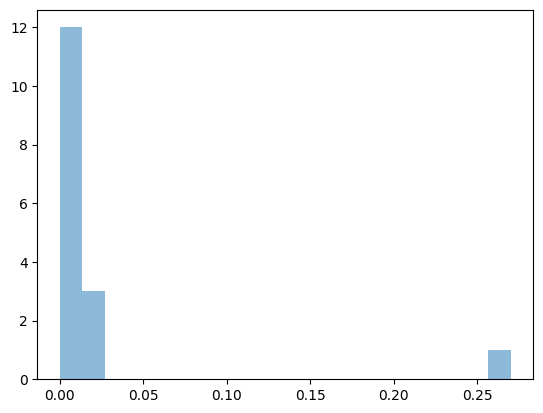

In [790]:
# plot the error distribution as a histogram for each quality flag
plt.hist(df2['LumPercentError'], bins=20, alpha=0.5)

In [791]:
df

,Galaxy,T,D,e_D,f_D,Inc,e_Inc,L[3.6],e_L[3.6],Reff,...,Rdisk,SBdisk,MHI,RHI,Vflat,e_Vflat,Q,Ref.,LumCalc,LumPercentError
0,CamB,10,3.36,0.26,2,65.0,5.0,0.075,0.003,1.21,...,0.47,66.20,0.012,1.21,0.0,0.0,2,Bm03,0.074995,7.141723e-05
1,D512-2,10,15.20,4.56,1,56.0,10.0,0.325,0.022,2.37,...,1.24,93.94,0.081,0.00,0.0,0.0,2,Tr09,0.325000,3.236365e-10
2,D564-8,10,8.79,0.28,2,63.0,7.0,0.033,0.004,0.72,...,0.61,21.13,0.029,0.00,0.0,0.0,2,Tr09,0.032977,6.892617e-04
3,D631-7,10,7.72,0.18,2,59.0,3.0,0.196,0.009,1.22,...,0.70,115.04,0.290,0.00,57.7,2.7,1,Tr09;dB01,0.196000,8.137057e-12
4,DDO064,10,6.80,2.04,1,60.0,5.0,0.157,0.007,1.20,...,0.69,151.65,0.211,3.49,46.1,3.9,1,dB02;Sw02,0.157000,8.447333e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,UGC12632,9,9.77,2.93,1,46.0,3.0,1.301,0.030,3.94,...,2.42,66.81,1.744,12.60,71.7,2.8,1,Sw09;Sw02,1.301000,0.000000e+00
171,UGC12732,9,13.20,4.00,1,39.0,6.0,1.667,0.048,3.12,...,1.98,120.46,3.660,17.41,0.0,0.0,1,Sw09;Sw02,1.667000,0.000000e+00
172,UGCA281,11,5.68,0.28,2,67.0,3.0,0.194,0.007,1.57,...,1.72,12.05,0.062,1.83,0.0,0.0,3,Le14,0.194000,2.998961e-09
173,UGCA442,9,4.35,0.22,2,64.0,7.0,0.140,0.005,1.71,...,1.18,116.10,0.263,4.37,56.4,2.1,1,Co00,0.140000,2.269384e-06


In [792]:
df2

,Galaxy,Dist,errD,M,Inc,erI,L[3.6],errL,Reff,SBeff,...,Aobs1,eAobs1,Aobs2,eAobs2,Abar1,eAbar1,Abar2,eAbar2,LumCalc,LumPercentError
0,NGC2685,16.1,4.8,1,65.0,4.0,30.037,0.277,1.92,1284.78,...,-8.56,0.16,-10.57,0.14,-8.44,0.11,-11.25,0.11,29.758504,0.009272
1,NGC2824,39.6,9.9,1,65.0,8.0,39.572,0.729,1.09,5209.91,...,-8.17,0.14,-9.96,0.12,-8.43,0.11,-10.13,0.11,38.892251,0.017178
2,NGC2859,26.2,6.5,1,35.0,5.0,89.085,0.820,1.59,5608.28,...,-8.44,0.14,-9.99,0.20,-8.44,0.11,-10.31,0.11,89.084840,0.000002
3,NGC2974,22.1,2.8,2,60.0,2.0,116.946,1.077,3.02,2017.58,...,-8.36,0.10,-9.59,0.06,-8.52,0.11,-10.01,0.11,115.617751,0.011358
4,NGC3522,25.2,3.2,2,41.0,2.0,13.183,0.243,1.42,1039.51,...,-8.43,0.10,-10.34,0.08,-8.73,0.11,-10.85,0.11,13.169983,0.000987
5,NGC3626,22.9,2.5,2,54.0,1.0,74.623,0.687,2.43,2017.58,...,-8.26,0.10,-10.16,0.06,-8.09,0.11,-10.29,0.11,74.855408,0.003114
6,NGC3838,23.1,5.8,1,66.0,8.0,22.492,0.207,1.03,3410.59,...,-8.36,0.14,-10.31,0.13,-8.44,0.11,-11.04,0.11,22.734418,0.010778
7,NGC3941,12.4,1.6,2,57.0,1.0,43.656,0.402,1.42,3474.00,...,-8.28,0.10,-10.22,0.07,-8.12,0.11,-10.43,0.11,44.013547,0.008190
8,NGC3945,22.8,5.7,1,57.0,5.0,126.319,1.163,2.50,3197.64,...,-8.42,0.14,-9.90,0.12,-8.52,0.11,-10.14,0.11,125.571029,0.005921
9,NGC3998,14.2,1.8,2,66.0,2.0,56.205,0.518,1.01,8807.04,...,-7.91,0.10,-9.84,0.09,-8.17,0.11,-10.44,0.11,56.448523,0.004333


In [793]:
sfb = pd.read_csv("Data/Galaxy Data/sfb.csv")
sfb

,galaxy,radius,mu,kill,error
0,NGC0289,0.65,14.084,1,0.001
1,NGC0289,0.72,14.104,1,0.001
2,NGC0289,0.79,14.128,1,0.002
3,NGC0289,0.87,14.158,1,0.002
4,NGC0289,0.96,14.192,1,0.002
...,...,...,...,...,...
12538,NGC3941,180.72,23.486,1,0.609
12539,NGC3941,198.79,23.691,1,0.704
12540,NGC3941,218.67,23.655,1,0.686
12541,NGC3941,240.54,24.499,0,1.164


In [794]:
galaxy_names = list(df["Galaxy"])
galaxy_names.extend(list(df2["Galaxy"]))
r_eff = list(df["Reff"])
r_eff.extend(list(df2["Reff"]))
lum = list(df["LumCalc"])
lum.extend(list(df2["LumCalc"]))
err = list(df["LumPercentError"])
err.extend(list(df2["LumPercentError"]))
sbeff = list(df["SBeff"])
sbeff.extend(list(df2["SBeff"]))
tlum = list(df["L[3.6]"])
tlum.extend(list(df2["L[3.6]"]))
dis = list(df["D"] * 10 ** 6)
dis.extend(list(df2["Dist"] * 10 ** 6))
df3 = pd.DataFrame({"Galaxy": galaxy_names, "Reff": r_eff, "LumCalc": lum, "LumPercentError": err, "SBeff": sbeff, "L[3.6]": tlum, "Dist": dis})
df3

,Galaxy,Reff,LumCalc,LumPercentError,SBeff,L[3.6],Dist
0,CamB,1.21,0.074995,7.141723e-05,7.89,0.075,3360000.0
1,D512-2,2.37,0.325000,3.236365e-10,9.22,0.325,15200000.0
2,D564-8,0.72,0.032977,6.892617e-04,10.11,0.033,8790000.0
3,D631-7,1.22,0.196000,8.137057e-12,20.93,0.196,7720000.0
4,DDO064,1.20,0.157000,8.447333e-10,17.41,0.157,6800000.0
...,...,...,...,...,...,...,...
186,NGC4262,0.69,28.360110,2.166033e-02,9480.47,28.988,16600000.0
187,NGC4278,1.63,81.542678,1.294390e-02,4884.61,82.612,15400000.0
188,NGC5582,3.07,55.116927,2.137643e-03,930.74,55.235,28100000.0
189,NGC6798,3.30,67.926446,1.684113e-02,992.73,69.090,37300000.0


In [795]:
# Get only the rows with these galaxies: NGC3741, NGC4138, UGC06614, NGC2915, NGC4278
galaxies = ["NGC2915", "NGC2998", "NGC3741", "NGC4138", "UGC00191", "UGC06614", "NGC4278"]
galaxy_legend = ["NGC2915 (Irregular)", "NGC2998 (Middle Spiral)", "NGC3741 (Irregular)", "NGC4138 (Lenticular)", "UGC00191 (Irregular)", "UGC06614 (Tight Spiral)", "NGC4278 (Elliptical)"]
df3 = df3[df3["Galaxy"].isin(galaxies)]
df3 = df3.reset_index()
df3

,index,Galaxy,Reff,LumCalc,LumPercentError,SBeff,L[3.6],Dist
0,48,NGC2915,0.53,0.641000,0.000000,347.40,0.641,4060000.0
1,51,NGC2998,7.06,150.902000,0.000000,479.55,150.902,68100000.0
2,56,NGC3741,0.32,0.028000,0.000001,42.94,0.028,3210000.0
3,72,NGC4138,1.91,44.111000,0.000000,1909.11,44.111,18000000.0
4,97,UGC00191,2.50,2.004000,0.000000,50.21,2.004,17100000.0
5,131,UGC06614,3.68,124.350000,0.000000,1461.61,124.350,88700000.0
6,187,NGC4278,1.63,81.542678,0.012944,4884.61,82.612,15400000.0


In [796]:
data = []
new_data = {galaxy: [[], []] for galaxy in galaxies}
print(new_data)
for galaxy in galaxies:
    print(galaxy)
    fin = open("Data/Galaxy Data/Rotmod_Undivided/" + galaxy + "_rotmod.dat")
    lines = fin.read().split("\n")[3:-1]
    for line in lines:
        data.append(line.strip().replace(",", ";").split())
    for line in data:
        new_data[galaxy][0].append(float(line[0]))
        new_data[galaxy][1].append(float(line[1]))
    data.clear()
new_data["NGC2998"]

{'NGC2915': [[], []], 'NGC2998': [[], []], 'NGC3741': [[], []], 'NGC4138': [[], []], 'UGC00191': [[], []], 'UGC06614': [[], []], 'NGC4278': [[], []]}
NGC2915
NGC2998
NGC3741
NGC4138
UGC00191
UGC06614
NGC4278


[[0.33,
  0.99,
  1.98,
  2.64,
  3.63,
  7.59,
  12.5,
  17.48,
  22.46,
  27.44,
  32.32,
  37.3,
  42.28],
 [90.0,
  125.0,
  148.0,
  180.0,
  201.0,
  206.0,
  214.0,
  212.0,
  213.0,
  214.0,
  213.0,
  213.0,
  203.0]]

In [797]:
# append the data as two new columns to the dataframe in a column called radius and vrot for each galaxy (for the row with NGC3741 there should be a list under radius and velocity)
r = []
v = []
for galaxy in galaxies:
    r.append(new_data[galaxy][0])
    v.append(new_data[galaxy][1])
rad = pd.Series(r, name="Radius")
vel = pd.Series(v, name="Velocity")
df3 = pd.concat([df3, rad, vel], axis=1)
df3

,index,Galaxy,Reff,LumCalc,LumPercentError,SBeff,L[3.6],Dist,Radius,Velocity
0,48,NGC2915,0.53,0.641000,0.000000,347.40,0.641,4060000.0,"[0.34, 0.67, 1.0, 1.34, 1.68, 2.01, 2.34, 2.67...","[13.5, 31.3, 35.3, 50.5, 61.0, 66.5, 74.4, 83...."
1,51,NGC2998,7.06,150.902000,0.000000,479.55,150.902,68100000.0,"[0.33, 0.99, 1.98, 2.64, 3.63, 7.59, 12.5, 17....","[90.0, 125.0, 148.0, 180.0, 201.0, 206.0, 214...."
2,56,NGC3741,0.32,0.028000,0.000001,42.94,0.028,3210000.0,"[0.23, 0.47, 0.7, 0.93, 1.17, 1.4, 1.64, 1.87,...","[13.1, 17.3, 23.6, 26.2, 27.4, 26.9, 27.4, 31...."
3,72,NGC4138,1.91,44.111000,0.000000,1909.11,44.111,18000000.0,"[2.61, 5.24, 7.85, 10.65, 13.47, 16.03, 18.58]","[179.0, 195.0, 181.0, 162.0, 145.0, 147.0, 150.0]"
4,97,UGC00191,2.50,2.004000,0.000000,50.21,2.004,17100000.0,"[0.62, 0.87, 1.12, 1.37, 1.62, 2.3, 4.97, 7.45...","[29.9, 34.4, 46.3, 49.8, 57.6, 71.3, 76.65, 81..."
5,131,UGC06614,3.68,124.350000,0.000000,1461.61,124.350,88700000.0,"[3.23, 9.18, 10.64, 11.58, 12.52, 13.57, 15.76...","[194.0, 172.0, 170.0, 170.0, 171.0, 172.0, 174..."
6,187,NGC4278,1.63,81.542678,0.012944,4884.61,82.612,15400000.0,"[0.85, 11.2]","[364.0, 256.0]"


In [798]:
# append the data as two new columns to the dataframe in a column called radius and vrot for each galaxy (for the row with NGC3741 there should be a list under radius and velocity)
r = []
mu = []
for galaxy in galaxies:
    new_df = sfb[sfb["galaxy"] == galaxy]
    r.append(list(map(float, list(new_df["radius"]))))
    mu.append(list(map(float, list(new_df["mu"]))))
    print(list(new_df["mu"]))
rad = pd.Series(r, name="Radius2")
sb2 = pd.Series(mu, name="SB")
df3 = pd.concat([df3, rad, sb2], axis=1)
df3 = df3.head(7)
df3
#     r.append(new_data[galaxy][0])
#     v.append(new_data[galaxy][1])
# rad = pd.Series(r, name="Radius")
# vel = pd.Series(v, name="Velocity")
# df3 = pd.concat([df3, rad, vel], axis=1)
# df3

[16.455, 16.469, 16.484, 16.5, 16.518, 16.542, 16.569, 16.582, 16.602, 16.624, 16.619, 16.612, 16.592, 16.614, 16.662, 16.717, 16.751, 16.808, 16.832, 16.847, 16.859, 16.877, 16.918, 17.0, 17.05, 17.101, 17.177, 17.24, 17.281, 17.343, 17.472, 17.542, 17.618, 17.744, 17.921, 18.082, 18.289, 18.444, 18.696, 18.945, 19.157, 19.281, 19.531, 19.757, 19.938, 20.171, 20.496, 20.722, 21.015, 21.263, 21.616, 21.89, 22.207, 22.627, 22.904, 23.292, 23.774, 24.267, 25.3]
[15.762, 15.776, 15.79, 15.808, 15.831, 15.86, 15.894, 15.938, 15.981, 16.031, 16.087, 16.146, 16.207, 16.273, 16.338, 16.395, 16.444, 16.497, 16.551, 16.592, 16.618, 16.654, 16.703, 16.749, 16.798, 16.849, 16.887, 16.92, 16.926, 16.958, 17.07, 17.133, 17.654, 17.847, 18.019, 18.169, 18.303, 18.394, 18.451, 18.639, 19.085, 19.374, 19.661, 19.773, 19.902, 20.344, 20.968, 21.191, 21.424, 21.617, 21.999, 22.383, 22.807, 23.473, 24.125, 24.928, 25.978]
[18.985, 19.01, 19.028, 19.054, 19.079, 19.101, 19.126, 19.153, 19.179, 19.21, 19.2

,index,Galaxy,Reff,LumCalc,LumPercentError,SBeff,L[3.6],Dist,Radius,Velocity,Radius2,SB
0,48,NGC2915,0.53,0.641000,0.000000,347.40,0.641,4060000.0,"[0.34, 0.67, 1.0, 1.34, 1.68, 2.01, 2.34, 2.67...","[13.5, 31.3, 35.3, 50.5, 61.0, 66.5, 74.4, 83....","[0.65, 0.72, 0.79, 0.87, 0.96, 1.05, 1.16, 1.2...","[16.455, 16.469, 16.484, 16.5, 16.518, 16.542,..."
1,51,NGC2998,7.06,150.902000,0.000000,479.55,150.902,68100000.0,"[0.33, 0.99, 1.98, 2.64, 3.63, 7.59, 12.5, 17....","[90.0, 125.0, 148.0, 180.0, 201.0, 206.0, 214....","[0.65, 0.72, 0.79, 0.87, 0.96, 1.05, 1.16, 1.2...","[15.762, 15.776, 15.79, 15.808, 15.831, 15.86,..."
2,56,NGC3741,0.32,0.028000,0.000001,42.94,0.028,3210000.0,"[0.23, 0.47, 0.7, 0.93, 1.17, 1.4, 1.64, 1.87,...","[13.1, 17.3, 23.6, 26.2, 27.4, 26.9, 27.4, 31....","[0.65, 0.72, 0.79, 0.87, 0.96, 1.05, 1.16, 1.2...","[18.985, 19.01, 19.028, 19.054, 19.079, 19.101..."
3,72,NGC4138,1.91,44.111000,0.000000,1909.11,44.111,18000000.0,"[2.61, 5.24, 7.85, 10.65, 13.47, 16.03, 18.58]","[179.0, 195.0, 181.0, 162.0, 145.0, 147.0, 150.0]","[0.65, 0.72, 0.79, 0.87, 0.96, 1.05, 1.16, 1.2...","[12.968, 12.987, 13.01, 13.043, 13.079, 13.126..."
4,97,UGC00191,2.50,2.004000,0.000000,50.21,2.004,17100000.0,"[0.62, 0.87, 1.12, 1.37, 1.62, 2.3, 4.97, 7.45...","[29.9, 34.4, 46.3, 49.8, 57.6, 71.3, 76.65, 81...","[0.65, 0.72, 0.79, 0.87, 0.96, 1.05, 1.16, 1.2...","[18.884, 18.903, 18.904, 18.905, 18.906, 18.90..."
5,131,UGC06614,3.68,124.350000,0.000000,1461.61,124.350,88700000.0,"[3.23, 9.18, 10.64, 11.58, 12.52, 13.57, 15.76...","[194.0, 172.0, 170.0, 170.0, 171.0, 172.0, 174...","[0.65, 0.72, 0.79, 0.87, 0.96, 1.05, 1.16, 1.2...","[14.441, 14.473, 14.51, 14.56, 14.624, 14.692,..."
6,187,NGC4278,1.63,81.542678,0.012944,4884.61,82.612,15400000.0,"[0.85, 11.2]","[364.0, 256.0]","[0.65, 0.72, 0.79, 0.87, 0.96, 1.05, 1.16, 1.2...","[12.659, 12.674, 12.691, 12.714, 12.743, 12.77..."


In [799]:
G = 6.67 * 10 ** -11
# Calculate the mass of the galaxy at each radius
mass = [[]] * 7
r = df3["Radius"].tolist()
v = df3["Velocity"].tolist()
max_radius = [max(r[i]) for i in range(len(r))]
df3["MaxRadius"] = max_radius
# do mass calculations for each galaxy
for i in range(len(galaxies)):
    mass[i] = [0] * len(r[i])
    for j in range(len(r[i])):
        mass[i][j] = ((r[i][j] * 3.086e+19) * (v[i][j] * 10 ** 3) ** 2 / G) / (1.989e+30)
df3["Mass"] = mass
df3

,index,Galaxy,Reff,LumCalc,LumPercentError,SBeff,L[3.6],Dist,Radius,Velocity,Radius2,SB,MaxRadius,Mass
0,48,NGC2915,0.53,0.641000,0.000000,347.40,0.641,4060000.0,"[0.34, 0.67, 1.0, 1.34, 1.68, 2.01, 2.34, 2.67...","[13.5, 31.3, 35.3, 50.5, 61.0, 66.5, 74.4, 83....","[0.65, 0.72, 0.79, 0.87, 0.96, 1.05, 1.16, 1.2...","[16.455, 16.469, 16.484, 16.5, 16.518, 16.542,...",10.04,"[14413908.430400183, 152685846.95585844, 28985..."
1,51,NGC2998,7.06,150.902000,0.000000,479.55,150.902,68100000.0,"[0.33, 0.99, 1.98, 2.64, 3.63, 7.59, 12.5, 17....","[90.0, 125.0, 148.0, 180.0, 201.0, 206.0, 214....","[0.65, 0.72, 0.79, 0.87, 0.96, 1.05, 1.16, 1.2...","[15.762, 15.776, 15.79, 15.808, 15.831, 15.86,...",42.28,"[621776442.0956943, 3598243299.164898, 1008843..."
2,56,NGC3741,0.32,0.028000,0.000001,42.94,0.028,3210000.0,"[0.23, 0.47, 0.7, 0.93, 1.17, 1.4, 1.64, 1.87,...","[13.1, 17.3, 23.6, 26.2, 27.4, 26.9, 27.4, 31....","[0.65, 0.72, 0.79, 0.87, 0.96, 1.05, 1.16, 1.2...","[18.985, 19.01, 19.028, 19.054, 19.079, 19.101...",7.00,"[9181332.847904857, 32720909.665830735, 906895..."
3,72,NGC4138,1.91,44.111000,0.000000,1909.11,44.111,18000000.0,"[2.61, 5.24, 7.85, 10.65, 13.47, 16.03, 18.58]","[179.0, 195.0, 181.0, 162.0, 145.0, 147.0, 150.0]","[0.65, 0.72, 0.79, 0.87, 0.96, 1.05, 1.16, 1.2...","[12.968, 12.987, 13.01, 13.043, 13.079, 13.126...",18.58,"[19452788904.190437, 46348513978.30496, 598221..."
4,97,UGC00191,2.50,2.004000,0.000000,50.21,2.004,17100000.0,"[0.62, 0.87, 1.12, 1.37, 1.62, 2.3, 4.97, 7.45...","[29.9, 34.4, 46.3, 49.8, 57.6, 71.3, 76.65, 81...","[0.65, 0.72, 0.79, 0.87, 0.96, 1.05, 1.16, 1.2...","[18.884, 18.903, 18.904, 18.905, 18.906, 18.90...",9.98,"[128934568.40207349, 239481209.2596236, 558489..."
5,131,UGC06614,3.68,124.350000,0.000000,1461.61,124.350,88700000.0,"[3.23, 9.18, 10.64, 11.58, 12.52, 13.57, 15.76...","[194.0, 172.0, 170.0, 170.0, 171.0, 172.0, 174...","[0.65, 0.72, 0.79, 0.87, 0.96, 1.05, 1.16, 1.2...","[14.441, 14.473, 14.51, 14.56, 14.624, 14.692,...",64.59,"[28277517958.969234, 63173491408.14209, 715277..."
6,187,NGC4278,1.63,81.542678,0.012944,4884.61,82.612,15400000.0,"[0.85, 11.2]","[364.0, 256.0]","[0.65, 0.72, 0.79, 0.87, 0.96, 1.05, 1.16, 1.2...","[12.659, 12.674, 12.691, 12.714, 12.743, 12.77...",11.20,"[26197328002.665333, 170739206203.83627]"


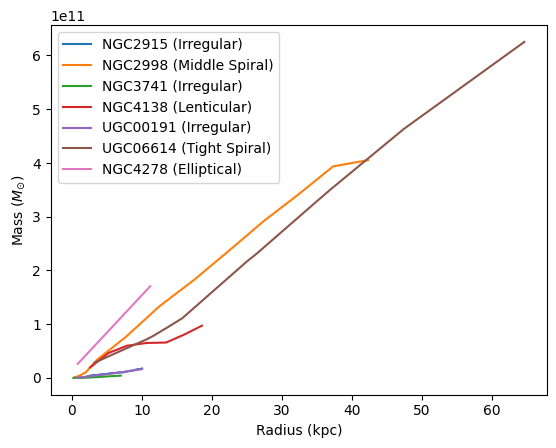

[array([ 1.73168644e+09, -1.02500332e+09]), array([ 1.03493558e+10, -2.60661056e+09]), array([ 6.62599139e+08, -6.37304211e+08]), array([4.08484443e+09, 1.86144606e+10]), array([ 1.73804470e+09, -1.38790722e+09]), array([ 1.02783138e+10, -3.52494629e+10]), array([1.39653989e+10, 1.43267390e+10])]
0.9997346369399704
0.9999996016866263
0.9997729705705778
0.9996726239484707
0.9997582840180885
0.9998032367999762
0.9999997380926544
0.9993957655801368
0.9985884530477059
0.9994133515774052
0.9999859869785834
0.999705712748516
0.9996087750063297
0.9999976733405583
0.9999749369611188
0.9999710645164406
0.9999671962570327
0.9999266548770557
0.9992542791831484
0.9999191432451474
0.9992476328651464
0.9973006401911539
0.9990008915871535
0.9997070869010624
0.9998713277867072
0.9997549574236124
0.9997270225183625
0.9988036090052259
0.9994562614919822
0.9983806413469714
0.9999998783269983
0.9999431208336613
0.9997882649798924
0.9999191166369675
0.9999974985449565
0.9999963574244153
0.9998573572901344


In [805]:
# plot mass vs radius for each galaxy
for i in range(len(galaxies)):
    plt.plot(r[i], mass[i], label=galaxy_legend[i])
plt.legend()
plt.rcParams['text.usetex'] = True
plt.xlabel(r"Radius (kpc)")
plt.ylabel(r"Mass ($M_{\odot}$)")
plt.rcParams['text.usetex'] = False
plt.show()
mass_fits = []
for i in range(len(galaxies)):
    mass_fits.append(np.polyfit(r[i], mass[i], 1))
print(mass_fits)
# calculate R^2 for each mass fit
for i in range(len(galaxies)):
    for j in range(len(mass[i])):
        residuals = mass[i][j] - (float(mass_fits[i][0]) * r[i][j] + float(mass_fits[i][1]))
        ss_res = np.sum(residuals ** 2)
        ss_tot = np.sum((mass[i] - np.mean(mass[i])) ** 2)
        r_squared = 1 - (ss_res / ss_tot)
        print(r_squared)

[2.73204641 1.00343705 0.9981483 ]
-0.1959033174081406
[2.73204655 1.00338587 0.99818423]
-0.1994096326880752
[2.73204373 1.00440918 0.99774937]
-0.21242512646644318
[2.73204581 1.00373866 0.99817624]
-0.1039912477190279
[2.73203195 1.00711401 0.99616198]
-0.16451213182343083
[2.73203633 1.0062827  0.99672991]
-0.23266542742842877
[2.73204703 1.00321759 0.99834507]
-0.18387223301539302


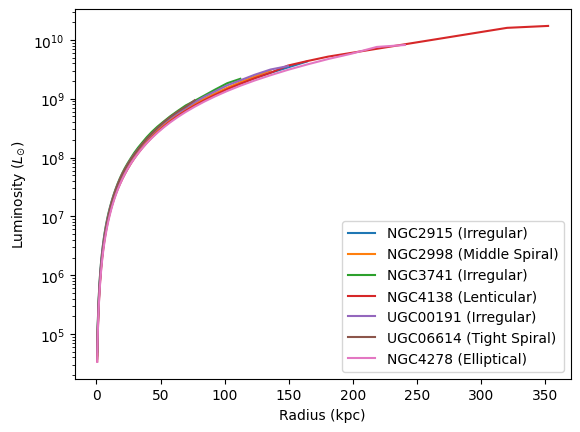

In [806]:
# Plot luminosity vs radius for each galaxy
def calcLum(r, sb, dis, totallum):
    # print(totallum / (1 + np.e ** (-1 * r * sb)))
    # return r ** 2 * 2 * np.pi * sb / 10 ** 3 / (1 + np.e ** (-1 * r * sb))
    # sb = 10 ** (-1 * (250 * sb - 250 * 5.48 - 5393) / 625)
    # sb = 10 ** ((sb - 22 + 5 * np.log10(dis / 10)) / -2.5)
    # # sa = dis ** 2 * (np.pi / 180) * (1 / 3600) ** 2
    # # flux = 10 ** (-0.4 * sb)
    # # f_total = flux * sa
    # # l_total = f_total / (3.828 * 10 ** 33)
    # # print(r, sb)
    # r = (dis * (10 ** 3) * r) / 206265
    # print(r)
    # return totallum / ((1 + np.e ** ((-1 * r * sb))))
    # print(r, sb, (r) ** 2 * 2 * np.pi * sb / 10 ** 3)
    return ((r * 10 ** 3) ** 2 * 2 * np.pi * sb / 10 ** 3)
    # return (2 * sb / 10 ** 3)
    # return sb
    # l_total = sb * 4 * np.pi * dis ** 2
    # print(((r) ** 2 * 2 * np.pi * sb / 10 ** 3), l_total)
    # return l_total
    # M = sb - 5 * np.log10(dis * 10 ** 6 / 10)
    # return 10 ** (0.4 * (4.83 - M))
    # pass

def logistic_curve(x, L, k, x0):
    return L / (1 + np.exp(-k * (x - x0)))

l = []

for i in range(len(galaxies)):
    radius = df3["Radius2"].tolist()[i]
    sb = df3["SB"].tolist()[i]
    dis = df3["Dist"].tolist()[i]
    totallum = df3["L[3.6]"].tolist()[i]
    reff = df3["Reff"].tolist()[i]
    lum = [calcLum(radius[j], sb[j], dis, totallum) for j in range(len(radius))]
    l.append(lum)
    plt.plot(radius, lum, label=galaxy_legend[i])
    # fit a logistic curve to the galaxy's luminosity as a function of radius using scipy optimize curve_fit
    popt, pcov = curve_fit(logistic_curve, radius, lum, method="trf")
    print(popt)
    # plot the graph beyond the last data point in radius
    x = np.linspace(radius[0], radius[-1] * 100, 100)
    # plt.plot(x, logistic_curve(x, *popt), label=galaxy_legend[i])
    # Computer r^2 value for fit
    residuals = lum - logistic_curve(radius, *popt)
    ss_res = np.sum(residuals ** 2)
    ss_tot = np.sum((lum - np.mean(lum)) ** 2)
    r_squared = 1 - (ss_res / ss_tot)
    print(r_squared)
    # print(totallum, logistic_curve(reff, *popt))
df3["Lum2"] = l
plt.legend()
plt.xlabel("Radius (kpc)")
plt.rcParams['text.usetex'] = True
plt.ylabel("Luminosity ($L_{\odot}$)")
plt.rcParams['text.usetex'] = False
plt.yscale("log")
# plt.xscale("log")
plt.show()

In [ ]:
df[df["Galaxy"] == "NGC3741"]

,Galaxy,T,D,e_D,f_D,Inc,e_Inc,L[3.6],e_L[3.6],Reff,...,Rdisk,SBdisk,MHI,RHI,Vflat,e_Vflat,Q,Ref.,LumCalc,LumPercentError
56,NGC3741,10,3.21,0.17,2,70.0,4.0,0.028,0.001,0.32,...,0.2,143.49,0.182,4.2,50.1,2.1,1,Ge07;Bm05,0.028,0.000001


In [ ]:
# print([df3["Lum2"][0][i] / df3["Radius"][0][i] for i in range(len(df3["Lum2"][0]))])
# df3
df3

,index,Galaxy,Reff,LumCalc,LumPercentError,SBeff,L[3.6],Dist,Radius,Velocity,Radius2,SB,MaxRadius,Mass,Lum2
0,48,NGC2915,0.53,0.641000,0.000000,347.40,0.641,4060000.0,"[0.34, 0.67, 1.0, 1.34, 1.68, 2.01, 2.34, 2.67...","[13.5, 31.3, 35.3, 50.5, 61.0, 66.5, 74.4, 83....","[0.65, 0.72, 0.79, 0.87, 0.96, 1.05, 1.16, 1.2...","[16.455, 16.469, 16.484, 16.5, 16.518, 16.542,...",10.04,"[14413908.430400183, 152685846.95585844, 28985...","[0.04368219651202293, 0.05364288054233081, 0.0..."
1,51,NGC2998,7.06,150.902000,0.000000,479.55,150.902,68100000.0,"[0.33, 0.99, 1.98, 2.64, 3.63, 7.59, 12.5, 17....","[90.0, 125.0, 148.0, 180.0, 201.0, 206.0, 214....","[0.65, 0.72, 0.79, 0.87, 0.96, 1.05, 1.16, 1.2...","[15.762, 15.776, 15.79, 15.808, 15.831, 15.86,...",42.28,"[621776442.0956943, 3598243299.164898, 1008843...","[0.041842526977970564, 0.05138563868090417, 0...."
2,56,NGC3741,0.32,0.028000,0.000001,42.94,0.028,3210000.0,"[0.23, 0.47, 0.7, 0.93, 1.17, 1.4, 1.64, 1.87,...","[13.1, 17.3, 23.6, 26.2, 27.4, 26.9, 27.4, 31....","[0.65, 0.72, 0.79, 0.87, 0.96, 1.05, 1.16, 1.2...","[18.985, 19.01, 19.028, 19.054, 19.079, 19.101...",7.00,"[9181332.847904857, 32720909.665830735, 906895...","[0.050398450366499876, 0.06191943403422848, 0...."
3,72,NGC4138,1.91,44.111000,0.000000,1909.11,44.111,18000000.0,"[2.61, 5.24, 7.85, 10.65, 13.47, 16.03, 18.58]","[179.0, 195.0, 181.0, 162.0, 145.0, 147.0, 150.0]","[0.65, 0.72, 0.79, 0.87, 0.96, 1.05, 1.16, 1.2...","[12.968, 12.987, 13.01, 13.043, 13.079, 13.126...",18.58,"[19452788904.190437, 46348513978.30496, 598221...","[0.03442544663433081, 0.042301298779722524, 0...."
4,97,UGC00191,2.50,2.004000,0.000000,50.21,2.004,17100000.0,"[0.62, 0.87, 1.12, 1.37, 1.62, 2.3, 4.97, 7.45...","[29.9, 34.4, 46.3, 49.8, 57.6, 71.3, 76.65, 81...","[0.65, 0.72, 0.79, 0.87, 0.96, 1.05, 1.16, 1.2...","[18.884, 18.903, 18.904, 18.905, 18.906, 18.90...",9.98,"[128934568.40207349, 239481209.2596236, 558489...","[0.05013033114147926, 0.061570913285061576, 0...."
5,131,UGC06614,3.68,124.350000,0.000000,1461.61,124.350,88700000.0,"[3.23, 9.18, 10.64, 11.58, 12.52, 13.57, 15.76...","[194.0, 172.0, 170.0, 170.0, 171.0, 172.0, 174...","[0.65, 0.72, 0.79, 0.87, 0.96, 1.05, 1.16, 1.2...","[14.441, 14.473, 14.51, 14.56, 14.624, 14.692,...",64.59,"[28277517958.969234, 63173491408.14209, 715277...","[0.038335739886364226, 0.04714150282889998, 0...."
6,187,NGC4278,1.63,81.542678,0.012944,4884.61,82.612,15400000.0,"[0.85, 11.2]","[364.0, 256.0]","[0.65, 0.72, 0.79, 0.87, 0.96, 1.05, 1.16, 1.2...","[12.659, 12.674, 12.691, 12.714, 12.743, 12.77...",11.20,"[26197328002.665333, 170739206203.83627]","[0.03360516108451525, 0.041281794158327806, 0...."


[2302834413.098321, 4134955361.3430037, 5306817339.536905, 6136935940.935788, 6664121936.832978, 6922662318.854117, 7022534862.767479, 6987665065.588287, 6844352872.781781, 6627683660.277747, 6376007889.636057, 6081230957.295578, 5763245524.5344, 5433230446.516417, 5077868887.336947, 4729678721.709269, 4402291253.099827, 4077636323.2826934, 3775208877.8580394, 3491852094.828953, 3221764091.0217614, 2966675225.929037, 2725947609.1082854, 2490902409.523305, 2282515898.71533, 2088699683.0298557, 1905444737.1707926, 1738436388.0095599, 1586665733.3650796, 1446289675.5731735, 1312944124.9212434, 1194656284.994773, 1086466238.3356097, 984559710.0147566, 889282060.2364368, 803835215.3614452, 724851740.1316019, 655155961.7779881, 589031599.4837402, 529677165.389556, 477108139.77432686, 431811211.88423085, 388184405.5392919, 349348348.88096464, 315164987.7519242, 283537662.2893749, 253959896.93520656, 228611722.8453768, 205118288.5440941, 184438571.26594713, 165078826.7124611, 148287573.2572006

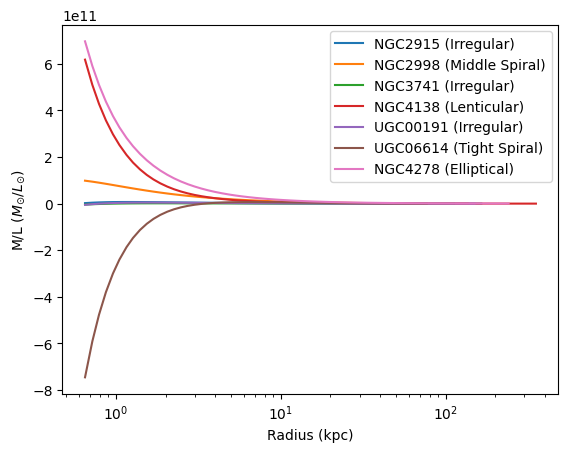

In [ ]:
# Graph M/L vs radius for each galaxy
# Figure out why there are spikes?
for i in range(len(galaxies)):
    radius = df3["Radius2"].tolist()[i]
    l = df3["Lum2"].tolist()[i]
    # m = df3["Mass"].tolist()[i]
    mass_function = lambda m, b, radius: m * radius + b
    # print(m)
    # print(m[0], l[0])
    ml = [mass_function(mass_fits[i][0], mass_fits[i][1], radius[j]) / l[j] for j in range(len(l))]
    print(ml)
    plt.plot(radius, ml, label=galaxy_legend[i])
plt.legend()
plt.xlabel("Radius (kpc)")
plt.rcParams['text.usetex'] = True
plt.ylabel(r"M/L ($M_{\odot}/L_{\odot}$)")
plt.rcParams['text.usetex'] = False
# plt.yscale("log")
plt.xscale("log")
plt.show()